In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=79b8302117521319ca0e706c9b4d2bb3d5e50dac4b85ceea03edc7bff7953bb0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import col, sum, avg, year, month, to_date, lit, desc, asc

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SalesAnalysis").getOrCreate()

In [ ]:
file1 = "/content/trans_fact_2013.csv"
df = spark.read.csv(file1, header=True, inferSchema=True)
df.count()

13799

In [ ]:
file1 = "/content/trans_fact_2014.csv"
df = spark.read.csv(file1, header=True, inferSchema=True)
df.count()

17531

In [ ]:
file1 = "/content/trans_fact_2011.csv"
df = spark.read.csv(file1, header=True, inferSchema=True)
df.count()

8998

In [ ]:
file1 = "/content/trans_fact_2012.csv"
df = spark.read.csv(file1, header=True, inferSchema=True)
df.count()

10962

In [ ]:
file_paths = [
    "/content/trans_fact_2013.csv",
    "/content/trans_fact_2012.csv",
    "/content/trans_fact_2011.csv",
    "/content/trans_fact_2014.csv"
]

dfs = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths] # Load each CSV file

combined_sales_df = dfs[0]   # Combine all DataFrames

for df in dfs[1:]:
    combined_sales_df = combined_sales_df.union(df)




+------+--------------+----------+----------+--------------+-----------+---------------+------+--------+--------+------+-------------+--------------+
|row_id|      order_id|order_date| ship_date|     ship_mode|customer_id|     product_id| sales|quantity|discount|profit|shipping_cost|order_priority|
+------+--------------+----------+----------+--------------+-----------+---------------+------+--------+--------+------+-------------+--------------+
|     7|MX-2013-134096|27-09-2013|01-10-2013|Standard Class|   DP-13000|OFF-EN-10001375| 56.12|       2|     0.0| 21.32|         4.11|        Medium|
|     8|MX-2013-134096|27-09-2013|01-10-2013|Standard Class|   DP-13000|TEC-MA-10004956|344.64|       3|     0.0|165.42|         26.2|        Medium|
|     9|MX-2013-134096|27-09-2013|01-10-2013|Standard Class|   DP-13000|OFF-SU-10003474| 97.36|       4|     0.0| 19.44|         6.86|        Medium|
+------+--------------+----------+----------+--------------+-----------+---------------+------+-----

51290

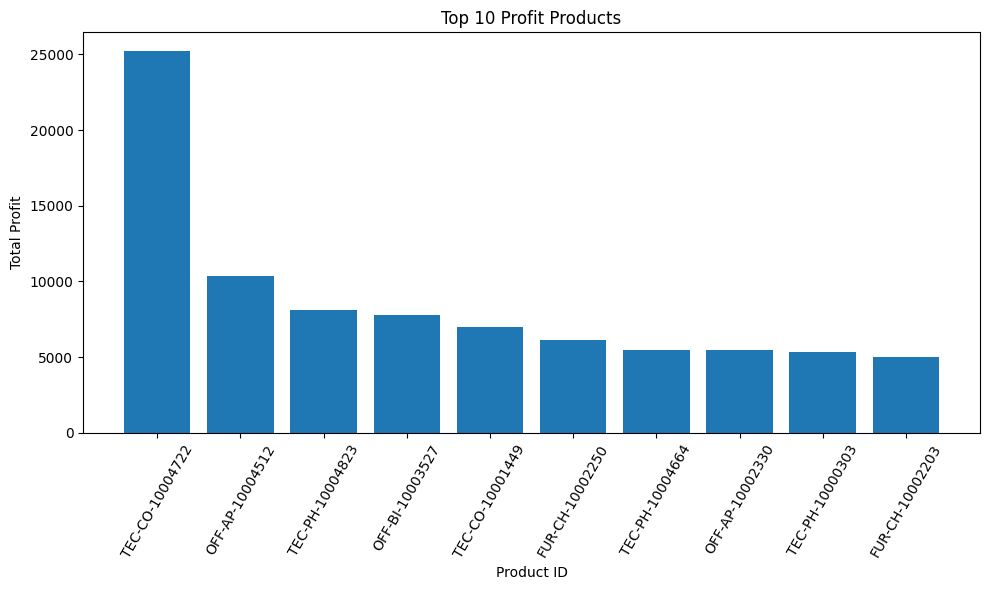

In [ ]:
# Group by product_id and sum profit
profit_grouped_df = combined_sales_df.groupBy("product_id").sum("profit")

# Sort by sum(profit) in descending order and select top 10
top_10_profit_products_df = profit_grouped_df.orderBy(desc("sum(profit)")).limit(10)

# Convert to Pandas DataFrame for visualization
top_10_profit_products_pd_df = top_10_profit_products_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_profit_products_pd_df['product_id'], top_10_profit_products_pd_df['sum(profit)'])
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.title('Top 10 Profit Products')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



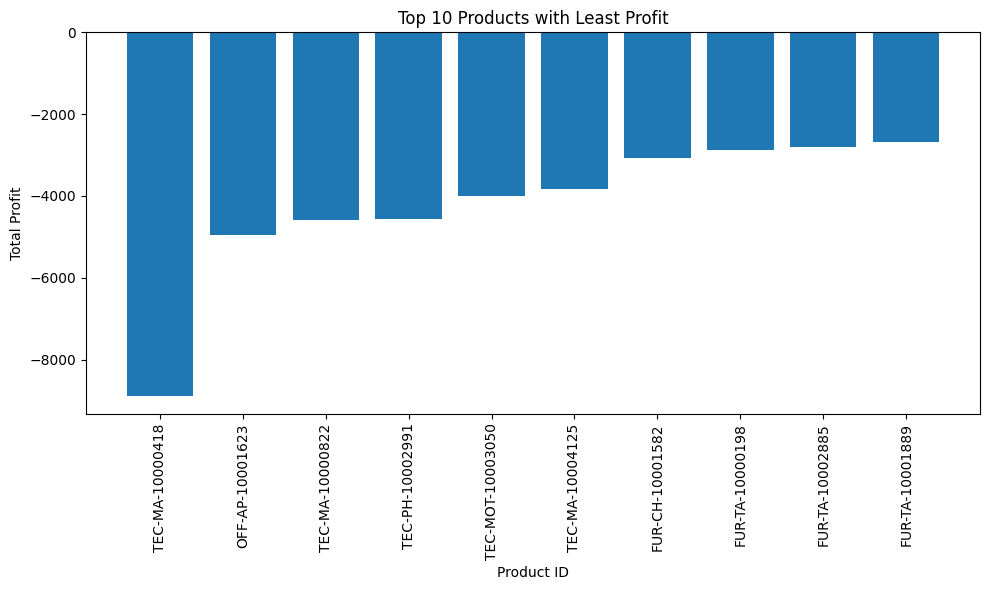

In [ ]:
# Sort by sum(profit) in ascending order and select top 10
bottom_10_profit_products_df = profit_grouped_df.orderBy(asc("sum(profit)")).limit(10)

# Convert to Pandas DataFrame for visualization
bottom_10_profit_products_pd_df = bottom_10_profit_products_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_profit_products_pd_df['product_id'], bottom_10_profit_products_pd_df['sum(profit)'])
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.title('Top 10 Products with Least Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
customer_file_path = "/content/customer.csv"
customer_df = spark.read.csv(customer_file_path, header=True, inferSchema=True)
customer_df.show(3)

+-----------+-------------+--------+
|customer_id|customer_name| segment|
+-----------+-------------+--------+
|   AA-10315|   Alex Avila|Consumer|
|   AA-10375| Allen Armold|Consumer|
|   AA-10480| Andrew Allen|Consumer|
+-----------+-------------+--------+
only showing top 3 rows



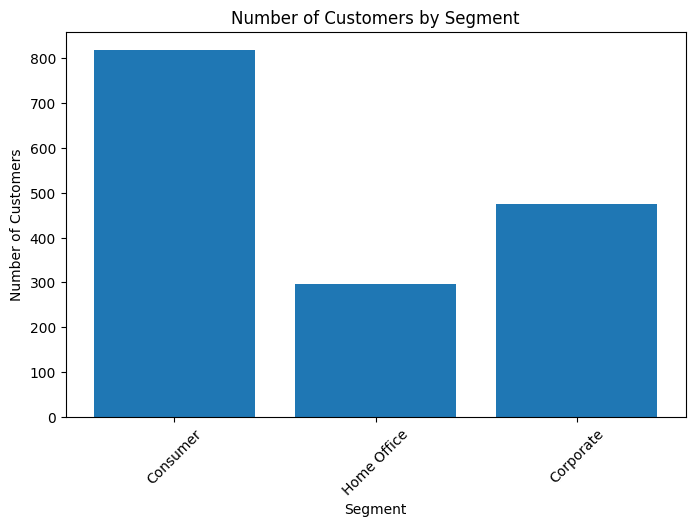

In [ ]:
# Group by segment and count the number of customers in each segment
segment_grouped_df = customer_df.groupBy("segment").count()

# Convert to Pandas DataFrame for visualization
segment_grouped_pd_df = segment_grouped_df.toPandas()

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(segment_grouped_pd_df['segment'], segment_grouped_pd_df['count'])
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Segment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
product_file_path = "/content/product.csv"
product_df = spark.read.csv(product_file_path, header=True, inferSchema=True)
product_df.show(3)

+---------------+----------+------------+--------------------+
|     product_id|  category|sub_category|        product_name|
+---------------+----------+------------+--------------------+
|TEC-AC-10003033|Technology| Accessories|Plantronics CS510...|
|FUR-CH-10003950| Furniture|      Chairs|Novimex Executive...|
|TEC-PH-10004664|Technology|      Phones|Nokia Smart Phone...|
+---------------+----------+------------+--------------------+
only showing top 3 rows



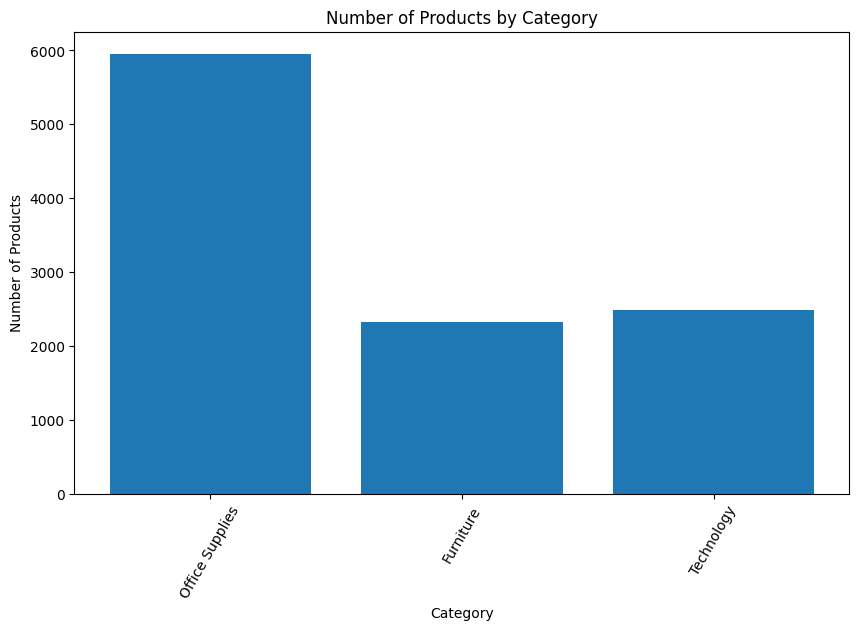

In [ ]:
# Group by category and count the number of products in each category
category_grouped_df = product_df.groupBy("category").count()

# Convert to Pandas DataFrame for visualization
category_grouped_pd_df = category_grouped_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_grouped_pd_df['category'], category_grouped_pd_df['count'])
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products by Category')
plt.xticks(rotation=60)
plt.show()

In [ ]:
shipping_file_path = "/content/shipping_destination.csv"
shipping_df = spark.read.csv(shipping_file_path, header=True, inferSchema=True)
shipping_df.show(3)

+---------------+----------+-------+--------------+-----------+------+-------+
|       order-id|      city|  state|       country|postal_code|market| region|
+---------------+----------+-------+--------------+-----------+------+-------+
| CA-2013-103982|Round Rock|  Texas| United States|      78664|    US|Central|
|ES-2012-2960821|     Parla| Madrid|         Spain|       NULL|    EU|  South|
|ES-2014-5334183|  Garforth|England|United Kingdom|       NULL|    EU|  North|
+---------------+----------+-------+--------------+-----------+------+-------+
only showing top 3 rows



In [ ]:
# Remove rows with null values
clean_shipping_df = shipping_df.dropna()

clean_shipping_df.show(3)


+--------------+-------------+----------+-------------+-----------+------+-------+
|      order-id|         city|     state|      country|postal_code|market| region|
+--------------+-------------+----------+-------------+-----------+------+-------+
|CA-2013-103982|   Round Rock|     Texas|United States|      78664|    US|Central|
|CA-2011-128055|San Francisco|California|United States|      94122|    US|   West|
|CA-2014-147039|  Minneapolis| Minnesota|United States|      55407|    US|Central|
+--------------+-------------+----------+-------------+-----------+------+-------+
only showing top 3 rows



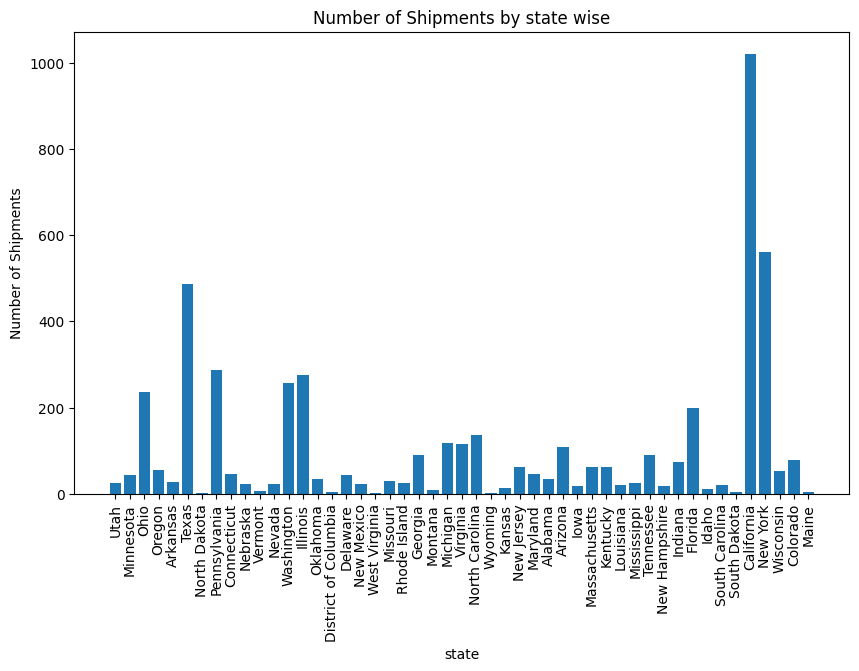

In [ ]:
# Group by country and count the number of occurrences
country_grouped_df = clean_shipping_df.groupBy("state").count()

# Convert to Pandas DataFrame for visualization
country_grouped_pd_df = country_grouped_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(country_grouped_pd_df['state'], country_grouped_pd_df['count'])
plt.xlabel('state')
plt.ylabel('Number of Shipments')
plt.title('Number of Shipments by state wise')
plt.xticks(rotation=90)
plt.show()

In [ ]:
shipping_df = shipping_df.withColumnRenamed("order-id", "order_id")

In [ ]:
combined_df = combined_sales_df.join(customer_df, on="customer_id", how="inner")   # Combine sales and customer data

combined_df = combined_df.join(product_df, on="product_id", how="inner")   # Combine with product data

combined_df = combined_df.join(shipping_df, on="order_id", how="inner")   # Combine with shipping destination data

combined_df.show(3)

+--------------+---------------+-----------+------+----------+----------+--------------+------+--------+--------+------+-------------+--------------+-------------+--------+---------------+------------+--------------------+---------+---------+-------+-----------+------+------+
|      order_id|     product_id|customer_id|row_id|order_date| ship_date|     ship_mode| sales|quantity|discount|profit|shipping_cost|order_priority|customer_name| segment|       category|sub_category|        product_name|     city|    state|country|postal_code|market|region|
+--------------+---------------+-----------+------+----------+----------+--------------+------+--------+--------+------+-------------+--------------+-------------+--------+---------------+------------+--------------------+---------+---------+-------+-----------+------+------+
|MX-2013-134096|OFF-EN-10001375|   DP-13000|     7|27-09-2013|01-10-2013|Standard Class| 56.12|       2|     0.0| 21.32|         4.11|        Medium|Darren Powers|Consum

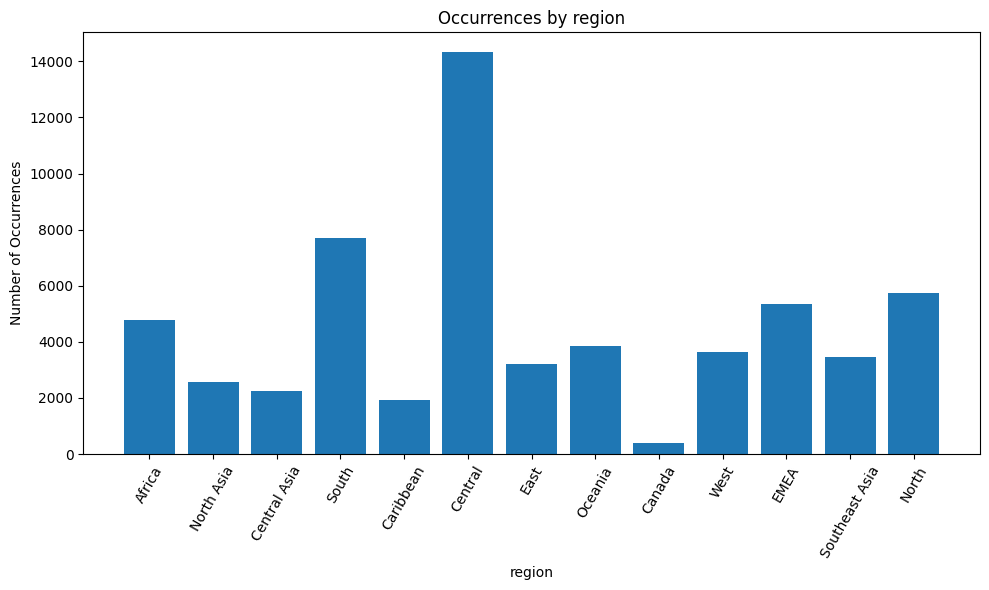

In [ ]:
# Group by country and count occurrences
country_grouped_df = combined_df.groupBy("region").count()

# Convert to Pandas DataFrame for visualization
country_grouped_pd_df = country_grouped_df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(country_grouped_pd_df['region'], country_grouped_pd_df['count'])
plt.xlabel('region')
plt.ylabel('Number of Occurrences')
plt.title('Occurrences by region')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
# correlation between discount and profit

discount_profit_corr = combined_df.stat.corr("discount", "profit")

print(f"Correlation between discount and profit: {discount_profit_corr}")

Correlation between discount and profit: -0.3179026656484242


In [ ]:
# Develop a model to analyze the impact of discounts on sales and profits
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


Linear Regression

In [ ]:
assembler = VectorAssembler(inputCols=["discount"], outputCol="features")
data = assembler.transform(combined_df)

# Training the model
lr = LinearRegression(featuresCol="features", labelCol="profit")
lr_model = lr.fit(data)

print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")


Coefficients: [-260.3343717006893]
Intercept: 65.65033527537972


In [ ]:
predictions = lr_model.transform(data)

evaluator = RegressionEvaluator(labelCol="profit", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Use the model to predict the impact of different discount rates

discounts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Make all discounts floats for consistency

discount_df = spark.createDataFrame([(d,) for d in discounts], ["discount"])
discount_df = assembler.transform(discount_df)

discount_predictions = lr_model.transform(discount_df)
discount_predictions.select("discount", "prediction").show()

Root Mean Squared Error (RMSE) on test data = 163.6385438773948
+--------+-------------------+
|discount|         prediction|
+--------+-------------------+
|     0.0|  65.65033527537972|
|     0.1|  39.61689810531078|
|     0.2| 13.583460935241852|
|     0.3|-12.449976234827076|
|     0.4| -38.48341340489601|
|     0.5| -64.51685057496493|
+--------+-------------------+



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

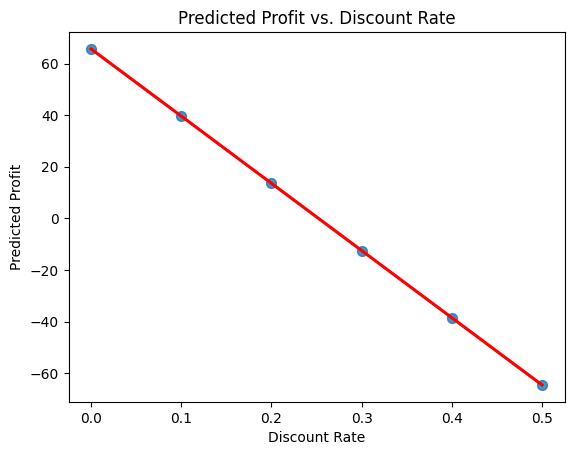

In [ ]:
# Convert predictions to Pandas DataFrame for plotting
discount_predictions_pd = discount_predictions.toPandas()

# Plot the predictions using seaborn's regplot
sns.regplot(x="discount", y="prediction", data=discount_predictions_pd, scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Predicted Profit vs. Discount Rate")
plt.xlabel("Discount Rate")
plt.ylabel("Predicted Profit")
plt.show()

<ipython-input-62-8c0b016fffa1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_sales", y="product_name", data=product_performance_pd.head(20), palette="viridis")


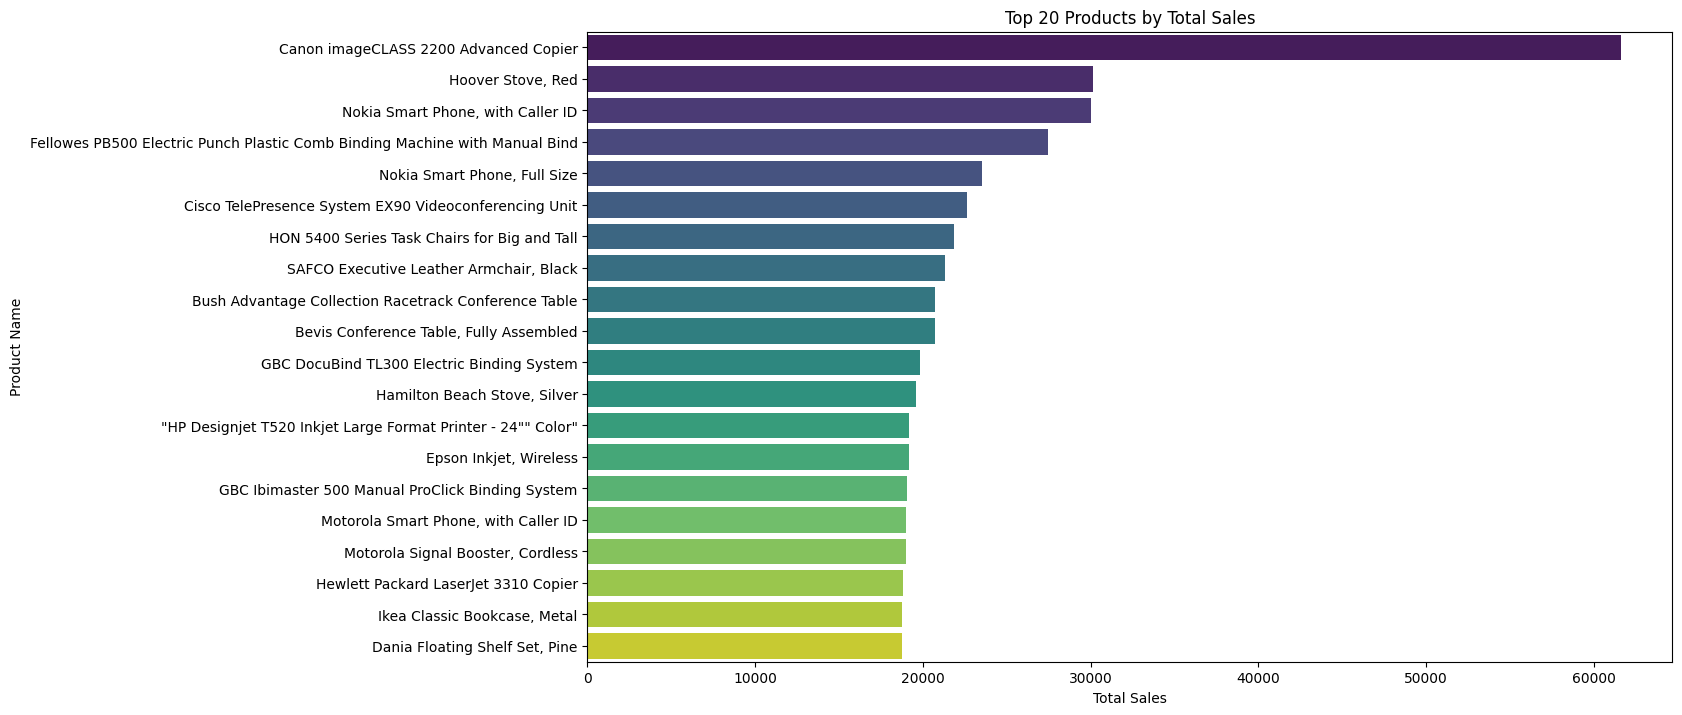

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data for product performance
product_performance = combined_df.groupBy("product_id", "product_name").agg(
    sum("sales").alias("total_sales"),
    sum("profit").alias("total_profit"),
    avg("sales").alias("avg_sales_per_order"),
    avg("profit").alias("avg_profit_per_order")
).orderBy("total_sales", ascending=False)

# Convert to Pandas DataFrame for visualization
product_performance_pd = product_performance.toPandas()

# Plot total sales and total profit for each product
plt.figure(figsize=(14, 18))

# Plot total sales
plt.subplot(2, 1, 1)
sns.barplot(x="total_sales", y="product_name", data=product_performance_pd.head(20), palette="viridis")
plt.title("Top 20 Products by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")


# plt.tight_layout()
plt.show()


DateParseError: Unknown datetime string format, unable to parse: 2014.0-11.0-01, at position 0

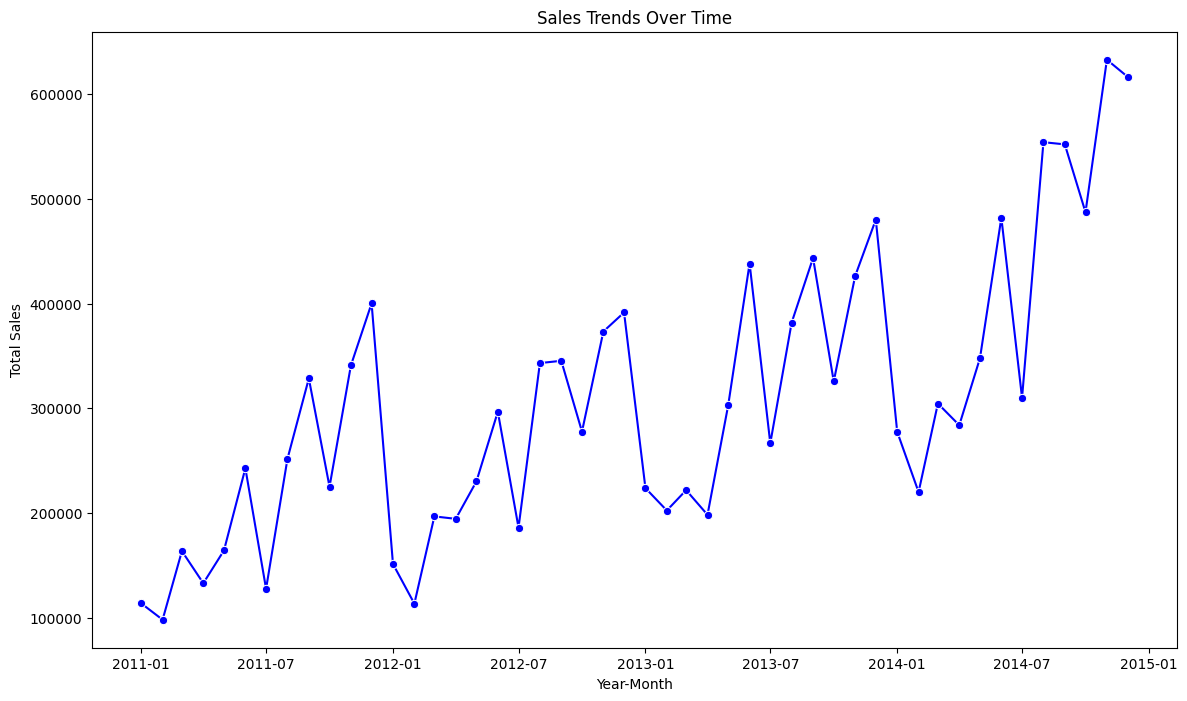

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col, year, month, sum

# Initialize Spark session
spark = SparkSession.builder.appName("SalesTrends").getOrCreate()

# Load the combined DataFrame (assuming it is already loaded as combined_df)
# If not, replace this line with the appropriate code to read your data file

# Convert order_date to a date type
combined_df = combined_df.withColumn('order_date', to_date(col('order_date'), 'dd-MM-yyyy'))

# Extract year and month
combined_df = combined_df.withColumn('year', year(col('order_date')))
combined_df = combined_df.withColumn('month', month(col('order_date')))

# Group by year and month to calculate total sales
sales_trends = combined_df.groupBy('year', 'month').agg(sum('sales').alias('total_sales')).orderBy('year', 'month')

# Convert to Pandas DataFrame for visualization
sales_trends_pd = sales_trends.toPandas()

# Convert year and month to integers
sales_trends_pd['year'] = sales_trends_pd['year'].astype(int)
sales_trends_pd['month'] = sales_trends_pd['month'].astype(int)

# Create a 'year_month' column for easier plotting
sales_trends_pd['year_month'] = pd.to_datetime(sales_trends_pd[['year', 'month']].assign(day=1))

# Identify peak and low sales months
peak_sales = sales_trends.orderBy(col('total_sales').desc()).limit(3).toPandas()
low_sales = sales_trends.orderBy(col('total_sales').asc()).limit(3).toPandas()

# Convert year and month to integers for peak and low sales
peak_sales['year'] = peak_sales['year'].astype(int)
peak_sales['month'] = peak_sales['month'].astype(int)
low_sales['year'] = low_sales['year'].astype(int)
low_sales['month'] = low_sales['month'].astype(int)

# Plot sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_month', y='total_sales', data=sales_trends_pd, marker='o', color='b')
plt.title("Sales Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")

# Highlight peak sales months
for index, row in peak_sales.iterrows():
    plt.annotate(f"Peak: {row['year']}-{row['month']}",
                 xy=(pd.to_datetime(f"{row['year']}-{row['month']}-01"), row['total_sales']),
                 xytext=(10, 10),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='green'),
                 fontsize=10,
                 color='green')

# Highlight low sales months
for index, row in low_sales.iterrows():
    plt.annotate(f"Low: {row['year']}-{row['month']}",
                 xy=(pd.to_datetime(f"{row['year']}-{row['month']}-01"), row['total_sales']),
                 xytext=(-50, -30),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=10,
                 color='red')

plt.grid(True)
plt.show()


In [ ]:
# Calculate total sales and profit for each customer
customer_performance = combined_df.groupBy("customer_id", "customer_name").agg(
    sum("sales").alias("total_sales"),
    sum("profit").alias("total_profit")
).orderBy("total_sales", ascending=False)

# Display the top customers
customer_performance.show()

# Identify high-value customers (top 10% of customers by total sales)
high_value_customers = customer_performance.orderBy(col("total_sales").desc()).limit(int(customer_performance.count() * 0.1))

# Display high-value customers
high_value_customers.show()

# Recommendations for customer loyalty programs
# 1. Implement a points-based loyalty program where customers earn points for every purchase.
# 2. Offer exclusive discounts and early access to sales for loyalty program members.
# 3. Personalize marketing efforts based on customer preferences and purchase history.

# Example loyalty program implementation steps:
# 1. Assign points based on total sales
customer_performance = customer_performance.withColumn("loyalty_points", col("total_sales") * 0.1)

# 2. Offer exclusive discounts to high-value customers
high_value_customers = high_value_customers.withColumn("exclusive_discount", lit("20%"))

# 3. Send personalized marketing messages
# (For demonstration, we'll just show the data that would be used for personalized marketing)
personalized_marketing = high_value_customers.select("customer_id", "customer_name", "total_sales", "total_profit", "exclusive_discount")

# Display personalized marketing data
personalized_marketing.show()


+-----------+----------------+------------------+------------------+
|customer_id|   customer_name|       total_sales|      total_profit|
+-----------+----------------+------------------+------------------+
|   SE-20110|    Sanjit Engle|44365.224220000004|        8342.51642|
|   GT-14710|       Greg Tran|42107.535280000004|        5777.47498|
|   TA-21385|    Tom Ashbrook|        39464.9173|         6902.2956|
|   BS-11365|    Bill Shonely|        38103.8368|        10381.3921|
|   BW-11110|    Bart Watters| 37977.30009999999|3053.0848999999994|
|   SW-20755|     Steven Ward|37912.985499999995|3155.2410999999993|
|   SM-20320|     Sean Miller|37805.394960000005|179.49426000000062|
|   PF-19120|    Peter Fuller|36958.047660000004| 831.2635599999996|
|   FH-14365|    Fred Hopkins| 36590.18702000001|        6693.79872|
|   PS-19045| Penelope Sewall|        36261.3609| 5302.436599999999|
|   TC-20980|    Tamara Chand| 36062.37899999999|         9144.7029|
|   AF-10870|    Art Ferguson|    